##**📋 TASK 3**

Name: FRANCIS OFOMATA

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

####📥 DATA IMPORTATION:

In [ ]:
#Importing the CSV files after unzipping

orders = pd.read_csv ("/content/drive/MyDrive/Tech Crush DATASETS/pizza_sales/orders.csv", encoding='latin1')
order_details = pd.read_csv ("/content/drive/MyDrive/Tech Crush DATASETS/pizza_sales/order_details.csv", encoding='latin1')
pizzas = pd.read_csv ("/content/drive/MyDrive/Tech Crush DATASETS/pizza_sales/pizzas.csv", encoding='latin1')
pizza_types = pd.read_csv ("/content/drive/MyDrive/Tech Crush DATASETS/pizza_sales/pizza_types.csv", encoding= 'latin1')

###🔍 DATA PREVIEW:

In [ ]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [ ]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [ ]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [ ]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [ ]:
#Checking for duplicates in each file

print("orders duplicates:", orders.duplicated().sum())
print("order_details duplicates:", order_details.duplicated().sum())
print("pizzas duplicates:", pizzas.duplicated().sum())
print("pizza_types duplicates:", pizza_types.duplicated().sum())

orders duplicates: 0
order_details duplicates: 0
pizzas duplicates: 0
pizza_types duplicates: 0


###🖇️ DATA MERGING:

In [ ]:
#Merging them into a single Dataframe

order_details_merge = pd.merge(orders, order_details, on = 'order_id', how = 'inner')
pizza_types_merge = pd.merge(pizzas, pizza_types, on = 'pizza_type_id', how = 'inner')
pizza_place_sales_df = pd.merge(order_details_merge, pizza_types_merge, on = 'pizza_id', how = 'inner')

pizza_place_sales_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [ ]:
pizza_place_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


### 📝 DATA MANIPULATION:

In [ ]:
#Converting the date and time columns to datetime format

pizza_place_sales_df["date"] = pd.to_datetime(pizza_place_sales_df["date"])
pizza_place_sales_df["time"] = pd.to_datetime(pizza_place_sales_df["time"], format = "%H:%M:%S").dt.time

In [ ]:
pizza_place_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


###📊 DATA ANALYSIS:

In [88]:
df = pizza_place_sales_df

1️⃣ **Total Revenue/ Sales**

In [ ]:
df["revenue/sales"] = df["quantity"] * df["price"]
total_revenue = df["revenue/sales"].sum()

print (f"The total revenue is ${total_revenue:,.2f}")

The total revenue is $817,860.05


In [ ]:
#Sales column added which is useful for analysis

df.head(2)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,revenue/sales
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00


2️⃣ **Total Quantity Sold**

In [ ]:
total_quantity_sold = df["quantity"].sum()

print(f"Total Quantity Sold is {total_quantity_sold}")

Total Quantity Sold is 49574


3️⃣ **Total Orders**

In [ ]:
total_orders = df["order_id"].value_counts().count()

print(f"Total Orders is {total_orders}")

Total Orders is 21350


4️⃣ **Number of Pizza Types Sold**

In [ ]:
num_of_pizza_types = df["pizza_type_id"].value_counts().count()

print(f"The Number of Pizza Types sold is {num_of_pizza_types}")

The Number of Pizza Types sold is 32


5️⃣ **The Average Price of the Pizzas**

In [ ]:
avg_price_of_pizzas = df["price"].mean()

print(f"The average price of the pizzas is ${avg_price_of_pizzas:.2f}")

The average price of the pizzas is $16.49


6️⃣ **The Peak Hours of Sales**

In [ ]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

peak_hourly_sales = df.groupby("hour")["revenue/sales"].sum().sort_values(ascending=False)

peak_hourly_sales.head()

,revenue/sales
hour,
12,111877.90
13,106065.70
18,89296.85
17,86237.45
19,72628.90


  🎨 **Data Viz**:

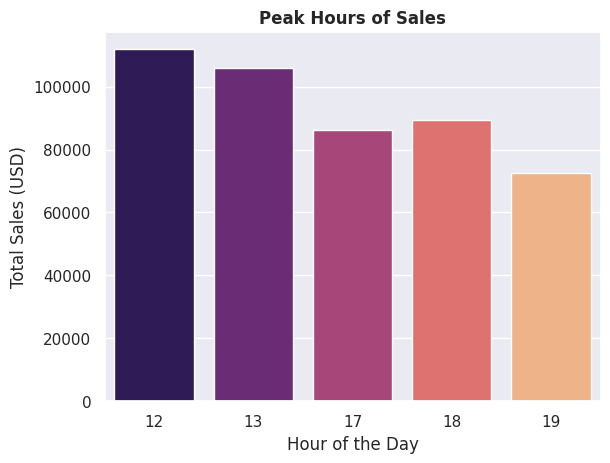

In [ ]:
peak_hours_of_sales = peak_hourly_sales.head()

sns.barplot(x=peak_hours_of_sales.index, y= peak_hours_of_sales.values, palette="magma")
plt.title("Peak Hours of Sales", fontweight = "bold")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales (USD)")
plt.show()

🔷️ **Recommendations / Trends:**

- Less sales are recorded on early mornings, and late night: consider procedures like free discounts and promo offers to get more sales at those times

- Increase your work force and shifts at these peak hours, so as to gain more revenue

- Optimize your menu and offer popular pizza types that can be prepared quickly during your peak hours

7️⃣ **Day of the Week with Most Sales**

In [ ]:
#Extracting day of the week from the date column
df['day of the week'] = pd.to_datetime(df['date']).dt.day_name()

#Total Sales made on each day of the week
daily_total_sales = df.groupby("day of the week")["revenue/sales"].sum().reset_index()

daily_total_sales

,day of the week,revenue/sales
0,Friday,136073.90
1,Monday,107329.55
2,Saturday,123182.40
3,Sunday,99203.50
4,Thursday,123528.50
5,Tuesday,114133.80
6,Wednesday,114408.40


In [ ]:
#Day of the Week with most Sales

most_sales_day = daily_total_sales.sort_values(by = "revenue/sales", ascending = False)

most_sales_day

,day of the week,revenue/sales
0,Friday,136073.90
4,Thursday,123528.50
2,Saturday,123182.40
6,Wednesday,114408.40
5,Tuesday,114133.80
1,Monday,107329.55
3,Sunday,99203.50


🎨 **Data Viz**:

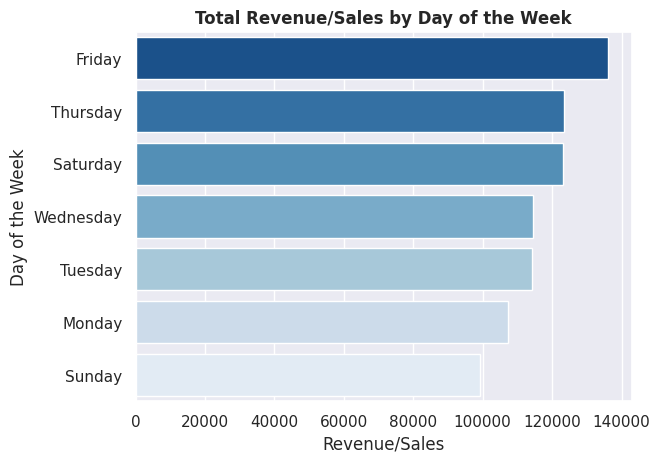

In [ ]:
sns.barplot(x='revenue/sales', y='day of the week', data=most_sales_day, palette = "Blues_r")
plt.xlabel('Revenue/Sales')
plt.ylabel('Day of the Week')
plt.title('Total Revenue/Sales by Day of the Week', fontweight = "bold")
plt.show()

🔷️ **Recommendations / Findings:**

- Friday has the highest sales: Consider running targeted promotions, discounts, or loyalty rewards on Fridays to further boost sales.

- Study customer behavior and preferences on high-sales days like Fridays to identify patterns and trends that can inform better marketing strategies for the other days

- Implement a loyalty program that rewards customers for repeat purchases, especially on high-sales days, to encourage customer retention and increase sales.

- Analyze menu items that are most popular on high-sales days and consider offering special deals of these for other days with less sales.

8️⃣ **The Top 5 Bestselling Pizzas**

In [ ]:
top_5_pizzas = df.groupby("pizza_id")["revenue/sales"].sum().sort_values(ascending = False).reset_index().head()
top_5_pizzas.index += 1

top_5_pizzas

,pizza_id,revenue/sales
1,thai_ckn_l,29257.50
2,five_cheese_l,26066.50
3,four_cheese_l,23622.20
4,spicy_ital_l,23011.75
5,big_meat_s,22968.00


🎨 **Data Viz**:

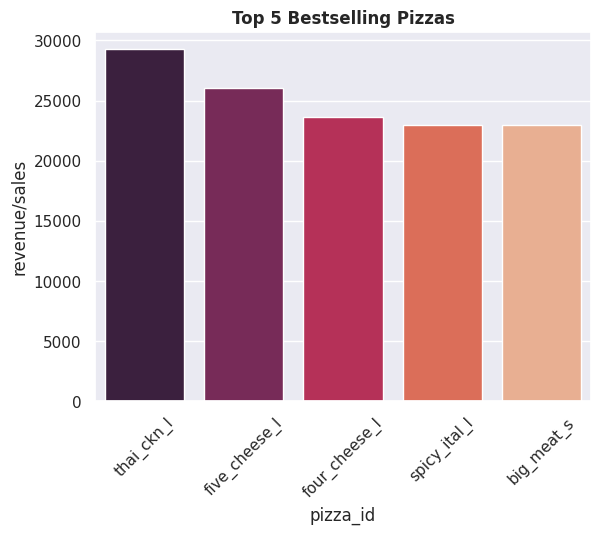

In [ ]:
sns.barplot(x="pizza_id", y="revenue/sales", data=top_5_pizzas, palette="rocket")
plt.xticks(rotation=45)
plt.title("Top 5 Bestselling Pizzas", fontweight = "bold")

plt.show()

🔷️ **Recommendations:**

- Incentivize customers to try other menu items apart from thai_ckn_l
- Use social media to showcase the top-selling pizzas and create engaging content around them.
- Provide limited-time seasonal variations of the top-selling pizzas to keep the menu fresh.
- Partner with influencers to promote the top-selling pizzas and reach out new customers.
- Optimize the menu by placing top-selling pizzas in prominent positions on the menu.

9️⃣ **Sales made in Each Month**

In [ ]:
#Extracting months from the date column
df['month'] = pd.to_datetime(df['date']).dt.month_name()

#Sales made Each Month
sales_per_month = df.groupby("month")["revenue/sales"].sum().reset_index().sort_values(by= "revenue/sales", ascending = False)

sales_per_month

,month,revenue/sales
5,July,72557.90
8,May,71402.75
7,March,70397.10
9,November,70395.35
4,January,69793.30
0,April,68736.80
1,August,68278.25
6,June,68230.20
3,February,65159.60
2,December,64701.15


🎨 **Data Viz**:

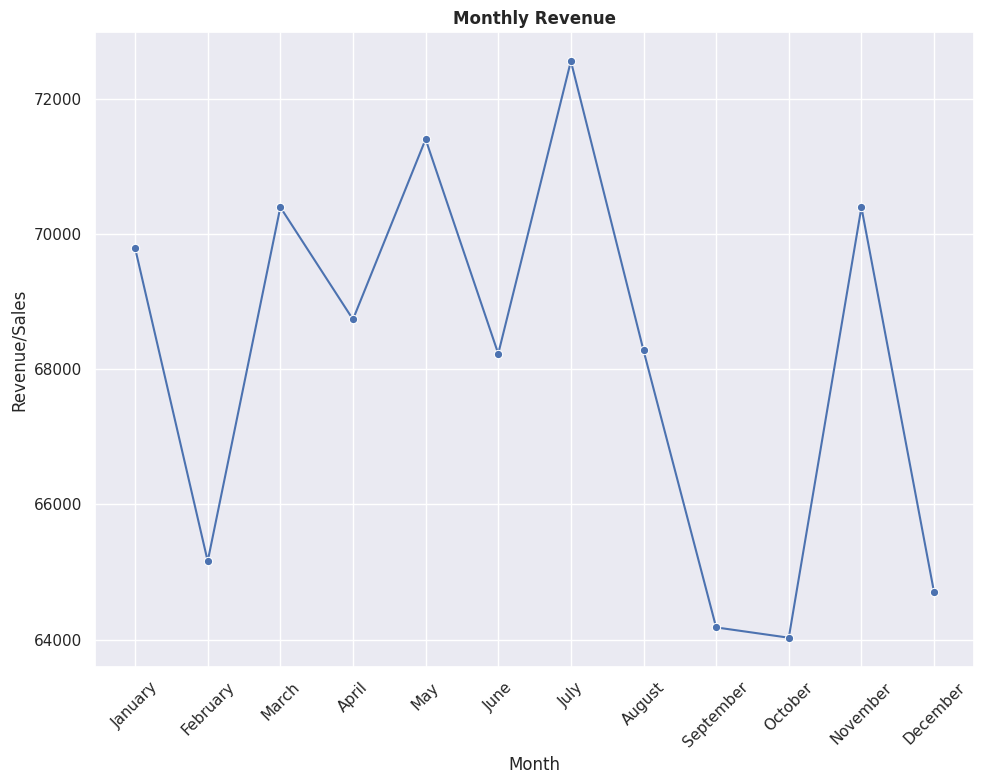

In [86]:
# Creating the DataFrame
data = {'month': ['July', 'May', 'March', 'November', 'January', 'April', 'August', 'June', 'February', 'December', 'September', 'October'],
        'revenue/sales': [72557.90, 71402.75, 70397.10, 70395.35, 69793.30, 68736.80, 68278.25, 68230.20, 65159.60, 64701.15, 64180.05, 64027.60]}
df = pd.DataFrame(data)

# Defining the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Plot
plt.figure(figsize=(10,8))
sns.lineplot(data=df.sort_values('month'), x='month', y='revenue/sales', marker='o')
plt.title('Monthly Revenue', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue/Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

⚠️ **Trends:**

- Sales per Month decreased from August, January, July
- The highest decrease occurred between August and July
- The highest sales are in October
- The lowest sales are in September

🔷️ **Recommendations:**

- Order in more pizzas that have had the highest sales, and less of those with lowest sales through the months

- Concentrate workforce more on the peak hours of sale

- Run targeted marketing campaigns to attract new customers, and review pricing strategies to ensure competitiveness.

- As the months go by, offer loyalty programs or discounts to retain customers and boost sales in later months.

🔟 **Pizza Types with Least Sales**

In [ ]:
least_sold_pizzatypes = df.groupby("pizza_type_id")["revenue/sales"].sum().sort_values(ascending= True).reset_index().head(10)

least_sold_pizzatypes.index += 1

least_sold_pizzatypes

,pizza_type_id,revenue/sales
1,brie_carre,11588.50
2,green_garden,13955.75
3,spinach_supr,15277.75
4,mediterraneo,15360.50
5,spin_pesto,15596.00
6,calabrese,15934.25
7,ital_veggie,16019.25
8,soppressata,16425.75
9,ckn_pesto,16701.75
10,ckn_alfredo,16900.25


 **🎨 Data Viz**:

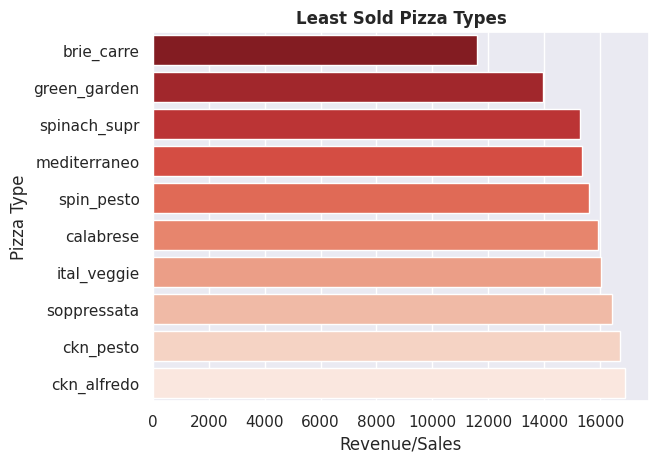

In [ ]:
sns.barplot(x='revenue/sales', y='pizza_type_id', data= least_sold_pizzatypes, palette="Reds_r")

plt.xlabel('Revenue/Sales')
plt.ylabel('Pizza Type')
plt.title('Least Sold Pizza Types', fontweight="bold")

plt.show()

🔷️ **Recommendations / Findings:**

- These least sold pizza types are generating lower revenue compared to other pizza types.
- These pizza types may have lower customer demand or preference.
- Discontinue or rebrand underperforming pizza types to minimize losses.
- Gather customer feedback to understand reasons for low sales.
- Consider removing or replacing least sold pizza types with new menu items.

###🔍 *EXTRA FURTHER ANALYSIS:*

💡 We can also check for:

**More Least Performing Pizza Types**

Sorting them in order, To know those to least consider selling:

In [ ]:
more_least_sold_pizzatypes = df.groupby("pizza_type_id")["revenue/sales"].sum().sort_values(ascending= True).reset_index().head(20)

more_least_sold_pizzatypes.index += 1

more_least_sold_pizzatypes

,pizza_type_id,revenue/sales
1,brie_carre,11588.50
2,green_garden,13955.75
3,spinach_supr,15277.75
4,mediterraneo,15360.50
5,spin_pesto,15596.00
6,calabrese,15934.25
7,ital_veggie,16019.25
8,soppressata,16425.75
9,ckn_pesto,16701.75
10,ckn_alfredo,16900.25


💡 We discovered, Sales decreased in some months, lets find out the:

**pizza_types_sold_in_least_performing_months**

In [94]:
pizza_types_sold_in_least_performing_months = df.groupby(["pizza_type_id", "month"])["revenue/sales"].sum().reset_index().sort_values(by = "revenue/sales", ascending = True)

pizza_types_sold_in_least_performing_months.head(20)

,pizza_type_id,month,revenue/sales
27,brie_carre,April,756.80
33,brie_carre,October,804.10
35,brie_carre,December,827.75
24,brie_carre,January,827.75
130,green_garden,November,836.50
315,spin_pesto,April,913.25
131,green_garden,December,918.00
29,brie_carre,June,946.00
321,spin_pesto,October,953.75
34,brie_carre,November,993.30


💡 So here, we can see the pizza types that had contributed to the low sales in January, July, August and September

This is just an example of the amazing findings we can have from our data

***

📋 Notes:
- 💬 Right Notebook Used.
- ✅ Markdown cells used appropriately
- 💻 Repository created and Notebook uploaded.